# Домашнє завдання
В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів `Keras`, яка буде класифікувати рецензії із датасету `imdb`.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу.
Поекспериментуйте з будовою мережі - __RNN__, __LSTM__, __двостороння__ та __глибока__.

Порівняйте результати та зробіть висновки.

## Imports

In [1]:
import random
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import (
  SimpleRNN,
  LSTM,
  Bidirectional,
  Embedding,
  Dense
)

from keras.datasets import imdb

from sklearn.metrics import (
  classification_report,
  confusion_matrix,
  ConfusionMatrixDisplay,
)

import matplotlib.pyplot as plt
%matplotlib inline

## Load DataSet

In [2]:
maxlen = 500  # обмеження на кількість слів в кожній рецензії
max_features = 10000  # обмеження на кількість слів (за частотою вживання)

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
class_names = ['Positive', 'Negative']

### Normalization

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

## Define functions

In [7]:
def create_model(model_type: str, max_features: int):

  model = Sequential(name = model_type)

  if model_type == 'SimpleRNN':
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32))
  elif model_type == 'LSTM':
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
  elif model_type == 'Bidirectional':
    model.add(Embedding(max_features, 32))
    model.add(Bidirectional(LSTM(32)))
  elif model_type == 'DeepRNN':
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32))
  else:
    raise ValueError("Wrong model type")

  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
  )

  return model

In [8]:
def train_model(model):
  history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=512,
    validation_data = (x_test, y_test),
    verbose=0,
  )
  return history

In [9]:
def plot_history(model_history, model_type):

  history_dict = model_history.history

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
  plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
  plt.title(f'Training and validation loss ({model_type})')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title(f'Training and validation accuracy ({model_type})')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [10]:
def model_evaluate(model):
  test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
  print('Model evaluate:\n')
  print(f'Test accuracy: {test_acc*100:.2f}%\nTest loss: {np.round(test_loss, 2)}')

In [11]:
def report(model):
  predictions = model.predict(x_test, verbose=0)
  binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
  report = classification_report(y_test, binary_predictions, target_names = class_names)
  print(f'Classification report:\n\n{report}')

In [12]:
def custom_test(model, test_num: int):
  random_indices = random.sample(range(len(y_test)), test_num)
  test_data = x_test[random_indices]
  test_labels = y_test[random_indices]

  predictions = model.predict(test_data, verbose=0)
  binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

  correct_predictions = (binary_predictions == test_labels)
  accuracy = sum(correct_predictions) / len(correct_predictions)

  print('Custom test:\n')
  print(f"Accuracy with {test_num} examples: {accuracy * 100:.2f}%\n")
  for i in range(len(random_indices)):
    print(f"Predicted: {binary_predictions[i]}, True: {test_labels[i]}\n")

## Models training

In [13]:
models_list = [
  'SimpleRNN',
  'LSTM',
  'Bidirectional',
  'DeepRNN',
]

Model: "SimpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




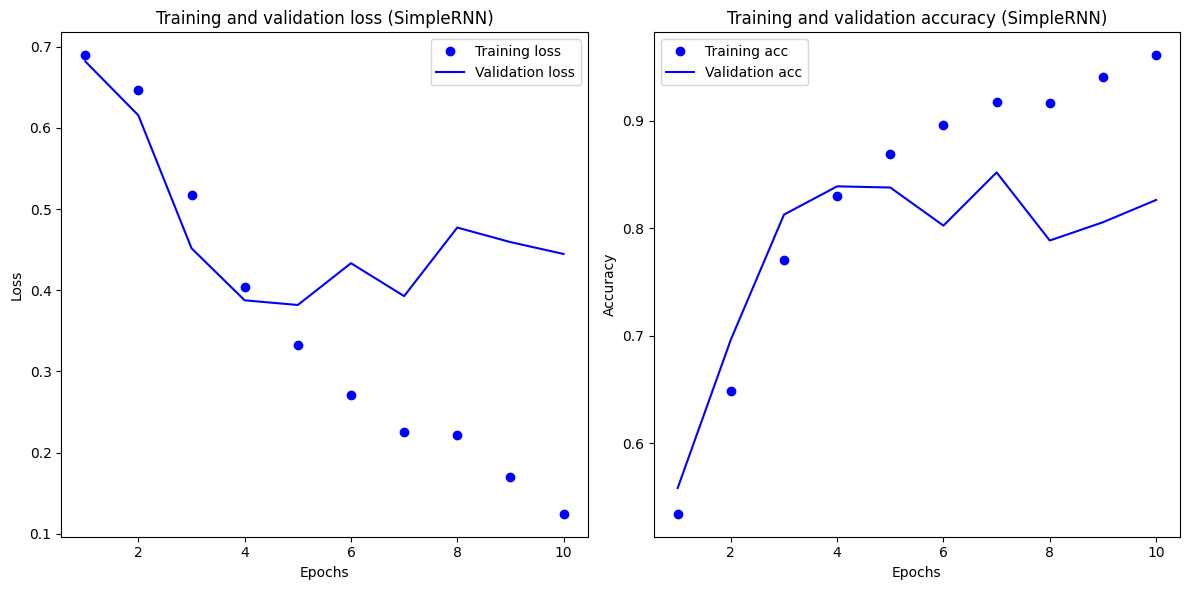



Model evaluate:

Test accuracy: 82.62%
Test loss: 0.44


Classification report:

              precision    recall  f1-score   support

    Positive       0.88      0.75      0.81     12500
    Negative       0.78      0.90      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



Custom test:

Accuracy with 10 examples: 80.00%

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 0, True: 0

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 1, True: 0

Predicted: 0, True: 0

Predicted: 0, True: 1

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (N

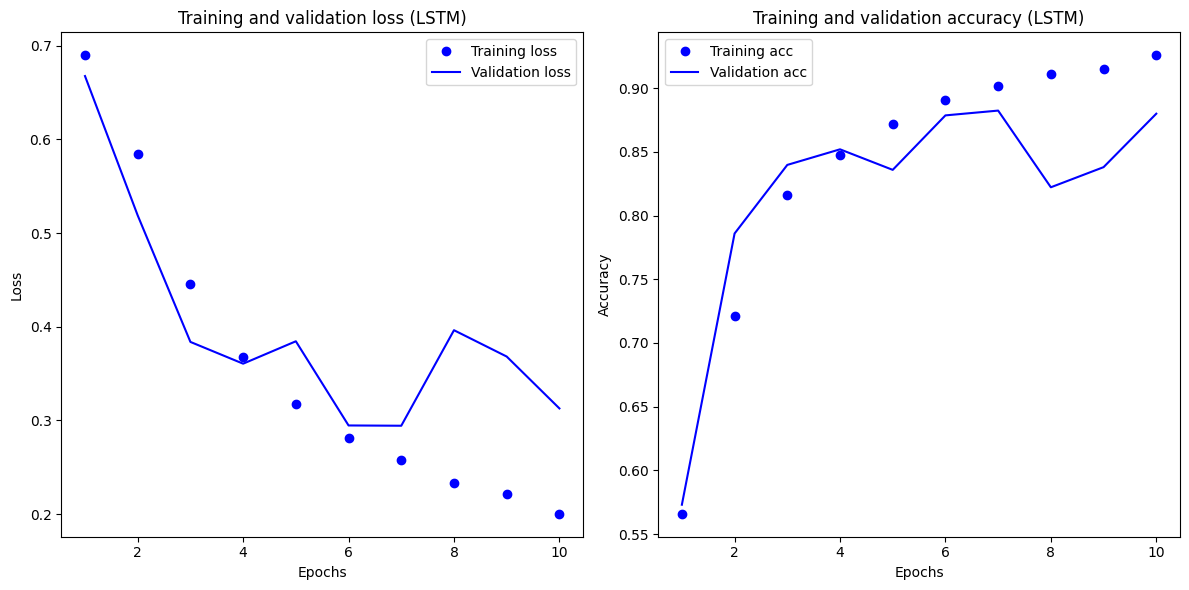



Model evaluate:

Test accuracy: 88.00%
Test loss: 0.31


Classification report:

              precision    recall  f1-score   support

    Positive       0.90      0.85      0.88     12500
    Negative       0.86      0.91      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Custom test:

Accuracy with 10 examples: 90.00%

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 0, True: 1

Predicted: 1, True: 1

Predicted: 0, True: 0

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 0, True: 0

Model: "Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidire

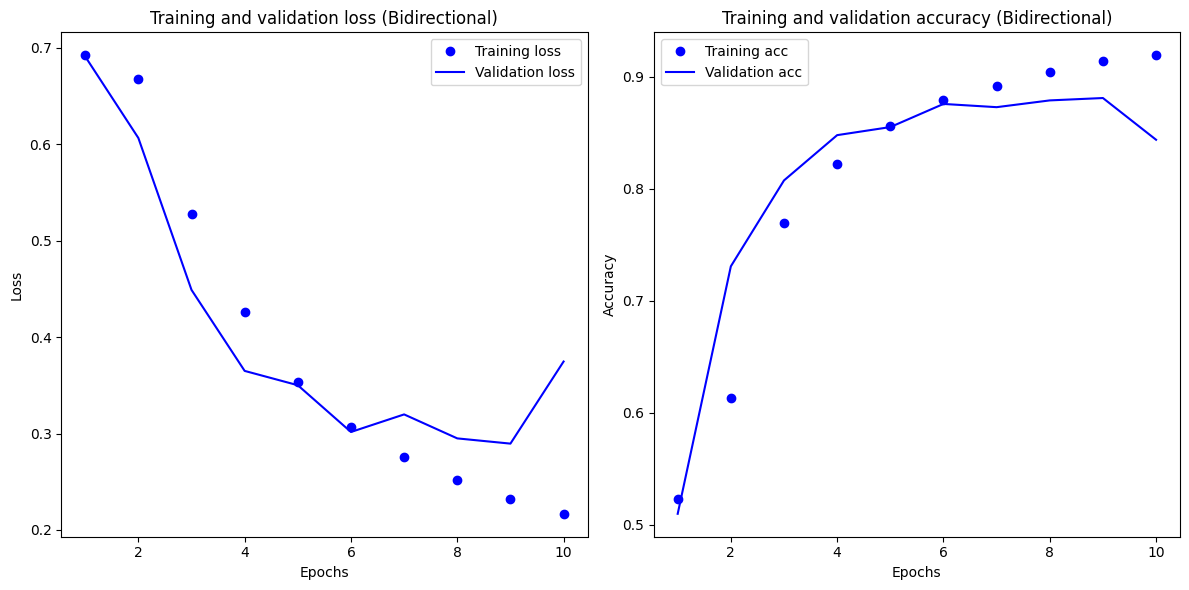



Model evaluate:

Test accuracy: 84.37%
Test loss: 0.37


Classification report:

              precision    recall  f1-score   support

    Positive       0.95      0.73      0.82     12500
    Negative       0.78      0.96      0.86     12500

    accuracy                           0.84     25000
   macro avg       0.86      0.84      0.84     25000
weighted avg       0.86      0.84      0.84     25000



Custom test:

Accuracy with 10 examples: 80.00%

Predicted: 1, True: 1

Predicted: 1, True: 1

Predicted: 1, True: 1

Predicted: 0, True: 0

Predicted: 1, True: 0

Predicted: 1, True: 1

Predicted: 1, True: 0

Predicted: 0, True: 0

Predicted: 0, True: 0

Predicted: 1, True: 1

Model: "DeepRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)   

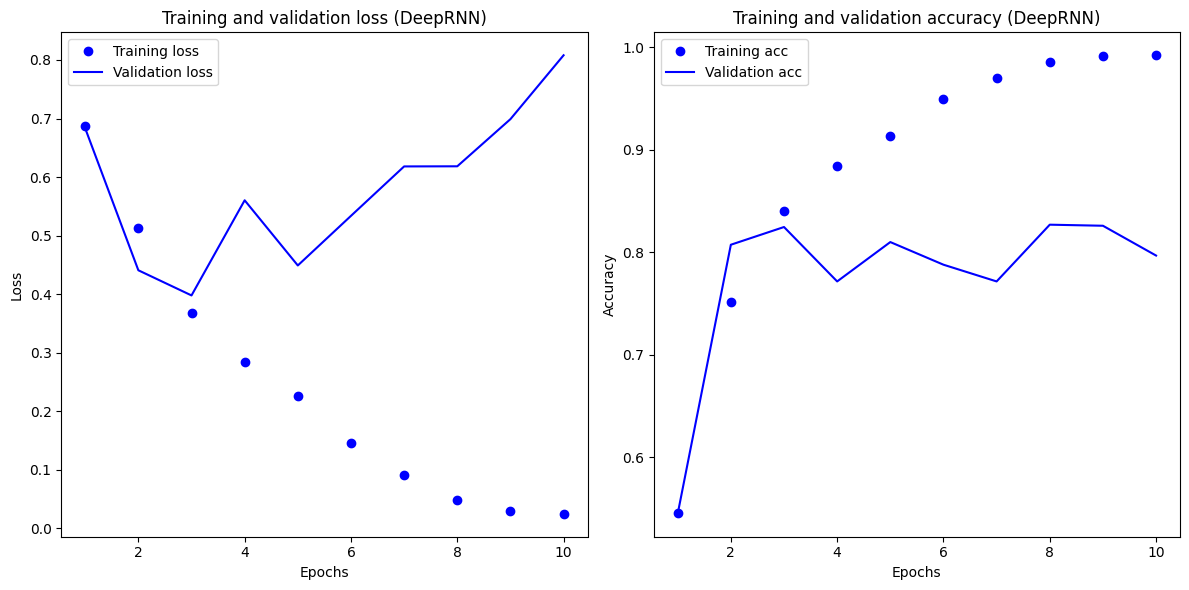



Model evaluate:

Test accuracy: 79.68%
Test loss: 0.81


Classification report:

              precision    recall  f1-score   support

    Positive       0.80      0.79      0.80     12500
    Negative       0.79      0.80      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



Custom test:

Accuracy with 10 examples: 80.00%

Predicted: 1, True: 1

Predicted: 1, True: 0

Predicted: 0, True: 0

Predicted: 0, True: 0

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 1, True: 0

Predicted: 0, True: 0

Predicted: 1, True: 1

Predicted: 1, True: 1



In [14]:
for model_type in models_list:
  model = create_model(model_type, max_features)
  model_history = train_model(model)
  # results
  print('\n'), plot_history(model_history, model_type)
  print('\n'), model_evaluate(model)
  print('\n'), report(model)
  print('\n'), custom_test(model, 10)

# Висновки

Найкращий результат, у порівнянні з іншими, показала модель з __використанням Long Short Term Memory (LSTM)__, за відносно тих же гіперпараметрів.